## Customized gymnasium environment: `smart-city`

In [1]:
import gymnasium
import matplotlib.pyplot as plt
import queue
# importing mobile_env automatically registers the predefined scenarios in Gym

In [2]:
import mobile_env
# predefined small scenarios
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default configuration
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 10,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.RoundRobin,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.smart_city_handler.MComSmartCityHandler,
 'bs': {'bw': 20000000.0,
  'freq': 2500,
  'tx': 40,
  'height': 50,
  'computational_power': 200},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5,
  'snr_tr': 2e-08,
  'noise': 1e-09,
  'velocity': 0,
  'radius': 500,
  'logs': {}},
 'arrival_params': {'ep_time': 100, 'reset_rng_episode': False},
 'channel_params': {},
 'scheduler_params': {'quantum': 2.0},
 'movement_params': {'width': 200, 'height': 200, 'reset_rng_episode': False},
 'utility_params': {'lower': -20, 'upper': 20, 'coeffs': (10, 0, 10)}

In [3]:
from gymnasium.envs.registration import register

# Register the new environment
register(
    id='mobile-smart_city-smart_city_handler-v0',
    entry_point='mobile_env.scenarios.smart_city:MComSmartCity',  # Adjust this if the entry point is different
    kwargs={'config': {}, 'render_mode': None}
)

In [4]:
import gymnasium as gym

# List all registered environments
env_specs = gym.envs.registry.keys()
print(env_specs)

# Verify your specific environment is listed
assert 'mobile-smart_city-smart_city_handler-v0' in env_specs, "Environment not registered correctly"
print("Environment 'mobile-smart_city-smart_city_handler-v0' registered successfully!")

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'mobile-small-ma-v0', 'mobile-small-central-v0', 'mobile-medium-ma-v0

In [5]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gymnasium.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 5 sensors and 1 cells.


c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_USERS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_USERS` for environment variables or `env.get_wrapper_attr('NUM_USERS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_SENSORS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_SENSORS` for environment variables or `env.get_wrapper_attr('NUM_SENSORS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_STATIONS to get variables from other wrappers is deprecated and will be removed in v1.0, to get th

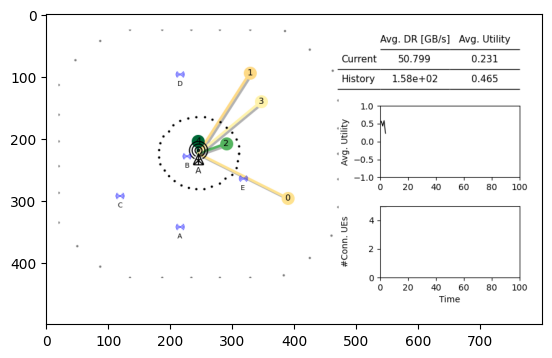

In [6]:
from IPython import display
import logging

# run the simulation for 10 time steps
done = False
obs, info = env.reset()
for _ in range(5):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    logging.warning(f"Sampled action: {dummy_action}")
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

The rendered environment shows the 6 cells as cell towers with circles indicating their range.
The 15 moving users are shown as small circles, where the number indicates the user ID and
the color represents the user's current QoE (red = bad, yellow = ok, green = good).

A line between a user and a cell indicates that the user is connected to the cell.
Again, the line color indicates the QoE that's achieved via the connection.
Note that users can connect to multiple cells simultaneously using coordinated multipoint (CoMP).

Here, with random action, users sometimes connect to cells but are oftentimes also completely disconnected from any cells, leading to bad QoE (red circles).

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

def create_animation(env, save_path_prefix):
    def update(frame, ax, queue_data, queue_label, entity_labels):
        ax.clear()
        time_step = env.queue_logs['time'][frame]
        queue_sizes = queue_data[frame]

        indices = range(len(queue_sizes))

        ax.bar(indices, queue_sizes, label=queue_label)
        ax.set_xlabel('Entity ID')
        ax.set_ylabel('Queue Size')
        ax.set_title(f'{queue_label} Sizes at Time Step {time_step}')
        ax.set_xticks(indices)
        ax.set_xticklabels(entity_labels, rotation=90)
        ax.legend()

    fig, ax = plt.subplots()
    entity_labels_bs = [f'BS{i}' for i in range(len(env.stations))]
    entity_labels_ue = [f'UE{i}' for i in range(len(env.users))]
    entity_labels_sensor = [f'Sensor{i}' for i in range(len(env.sensors))]

    # Create animations for each type of queue
    queue_types = [
        ('bs_uplink_ue_queues', 'BS Uplink UE Queues', entity_labels_bs),
        ('bs_downlink_ue_queues', 'BS Downlink UE Queues', entity_labels_bs),
        ('bs_uplink_sensor_queues', 'BS Uplink Sensor Queues', entity_labels_bs),
        ('bs_downlink_sensor_queues', 'BS Downlink Sensor Queues', entity_labels_bs),
        ('ue_uplink_queues', 'UE Uplink Queues', entity_labels_ue),
        ('sensor_uplink_queues', 'Sensor Uplink Queues', entity_labels_sensor)
    ]

    for queue_key, queue_label, entity_labels in queue_types:
        queue_data = env.queue_logs[queue_key]
        anim = animation.FuncAnimation(fig, update, fargs=(ax, queue_data, queue_label, entity_labels),
                                       frames=len(env.queue_logs['time']), repeat=False)
        save_path = f'{save_path_prefix}_{queue_key}.gif'
        anim.save(save_path, writer='imagemagick')
        print(f"Animation saved to {save_path}")


# Create and save the animations
save_path_prefix = 'queue_sizes_animation'
create_animation(env, save_path_prefix)
